In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from ModelTree import ModelTree

import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
class logistic_regr:

    def __init__(self):
        from sklearn.linear_model import LogisticRegression
        self.model = LogisticRegression(penalty="l2",solver='liblinear')
        self.flag = False
        self.flag_y_pred = None

    def fit(self, X, y):
        y_unique = list(set(y))
        if len(y_unique) == 1:
            self.flag = True
            self.flag_y_pred = y_unique[0]
        else:
            self.model.fit(X, y)

    def predict(self, X):
        if self.flag:
            return self.flag_y_pred * np.ones((len(X),), dtype=int)
        else:
            return self.model.predict(X)

    def loss(self, X, y, y_pred):
        return mean_squared_error(y, y_pred)

    def predict_proba(self,X):
        return self.model.predict_proba(X)

# Read Dataset

In [3]:

dataset = pd.read_csv('cleve.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 13].values

# Handling missing data

In [4]:
from sklearn.impute import SimpleImputer as imp
imputer=imp(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])

# Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =9)

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# EXPLORING THE DATASET

In [7]:


dataset.num.value_counts()

0    165
1    138
Name: num, dtype: int64

# No of decisioin Trees

In [8]:
esitmators=5
y_pred=[]
n_train_split=int(len(X_train)/esitmators)
inital_train=0
final_train=0

In [9]:
yy_pred=[]
classifier=None

for i in range(1,esitmators+1):

    classifier =logistic_regr()

    final_train=i*n_train_split
    temp_X_train=X_train[inital_train:final_train]
    temp_y_train=y_train[inital_train:final_train]


    L=ModelTree(classifier,max_depth=20, min_samples_leaf=10)

    node=L.fit(temp_X_train,temp_y_train,verbose=False)
    classifier=node["model"]

    y_pred_temp=L.predict(X_test)
    yy_pred.append(y_pred_temp)

In [10]:
for j in range(len(yy_pred[0])):
    curr=[]
    for i in range(len(yy_pred)):
        curr.append(yy_pred[i][j])
    a=curr.count(0)
    b=curr.count(1)
    if a>b:
        y_pred.append(0)
    else:
        y_pred.append(1)

# ACCURACY SCORE

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.868421052631579

# Making the Confusion Matrix

In [12]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


# Interpretation:

In [13]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        47
           1       0.81      0.86      0.83        29

    accuracy                           0.87        76
   macro avg       0.86      0.87      0.86        76
weighted avg       0.87      0.87      0.87        76



# ROC

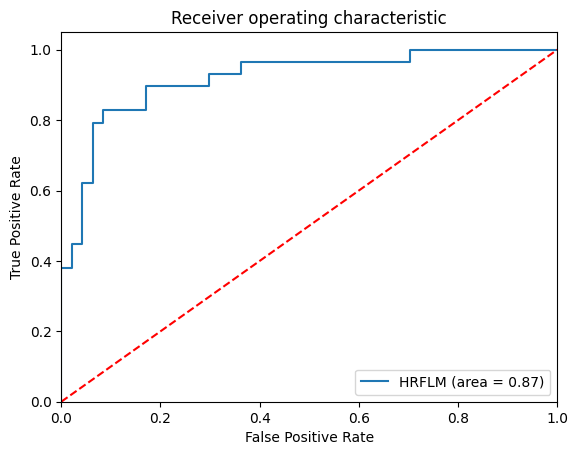

In [14]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='HRFLM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()